<a href="https://colab.research.google.com/github/parth5757/Image_Calculator/blob/main/Auto_Bill_Labeling(RoboFlow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unziping the file that manually labeled throw the labeled studio

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile, os

# Path to your uploaded ZIP file in Drive
ZIP_PATH = "/content/drive/MyDrive/REGIONAL_BILL_DATA/204_labeled_seed.zip"

# Output folder where extracted dataset will be stored
OUT_DIR = "/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset"

# Create output directory
os.makedirs(OUT_DIR, exist_ok=True)

# Extract ZIP
with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(OUT_DIR)

print("Extracted to:", OUT_DIR)

✅ Extracted to: /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset


In [ ]:
!find /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset -maxdepth 3 -type d


/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset
/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/images
/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/labels


In [ ]:
!find /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset -maxdepth 3 -type f | sed 's/.*\///'


00e596ff-Gujarati_bill_image_page_58.png
03052b0d-Gujarati_bill_image_page_144.png
035b9843-Gujarati_bill_image_page_143.png
0507dd66-Gujarati_bill_image_page_176.png
05e40876-Gujarati_bill_image_page_149.png
062c9e14-Gujarati_bill_image_page_156.png
06870633-Gujarati_bill_image_page_59.png
0772639c-Gujarati_bill_image_page_139.png
0a21bad2-Gujarati_bill_image_page_48.png
0af04421-Gujarati_bill_image_page_195.png
0d476895-Gujarati_bill_image_page_52.png
0de48a3c-Gujarati_bill_image_page_161.png
0e88d99a-Gujarati_bill_image_page_87.png
0f022218-Gujarati_bill_image_page_46.png
11a69c48-Gujarati_bill_image_page_115.png
11bb9582-Gujarati_bill_image_page_136.png
123e29bf-Gujarati_bill_image_page_70.png
134e2e22-Gujarati_bill_image_page_107.png
1e1623fd-Gujarati_bill_image_page_27.png
1ecf294c-Gujarati_bill_image_page_110.png
1f669fe6-Gujarati_bill_image_page_148.png
252a5163-Gujarati_bill_image_page_86.png
256e0c9c-Gujarati_bill_image_page_35.png
2702db2a-Gujarati_bill_image_page_154.png
27

Seed images dir: /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/images
Seed labels dir: /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/labels
Classes file: /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/classes.txt exists: True
Images found: 204
Label files found: 204
Empty label files: 0
Total labeled object instances across seed set: 1210

Gujarati_bill_image_page_58.png -> ['00e596ff-Gujarati_bill_image_page_58.png', 'c0d56796-Gujarati_bill_image_page_58.png']
Gujarati_bill_image_page_57.png -> ['56d8f40e-Gujarati_bill_image_page_57.png', 'cb276b1f-Gujarati_bill_image_page_57.png']
Gujarati_bill_image_page_55.png -> ['73192240-Gujarati_bill_image_page_55.png', 'fbb153a2-Gujarati_bill_image_page_55.png']
Gujarati_bill_image_page_54.png -> ['adab08cc-Gujarati_bill_image_page_54.png', 'efaf023d-Gujarati_bill_image_page_54.png']
Gujarati_bill_image_page_56.png -> ['bca81db6-Gujarati_bill_image_page_56.png', 'bd78b40a-Gujarati_bill_image_page_56.png']
Gujarati_bil

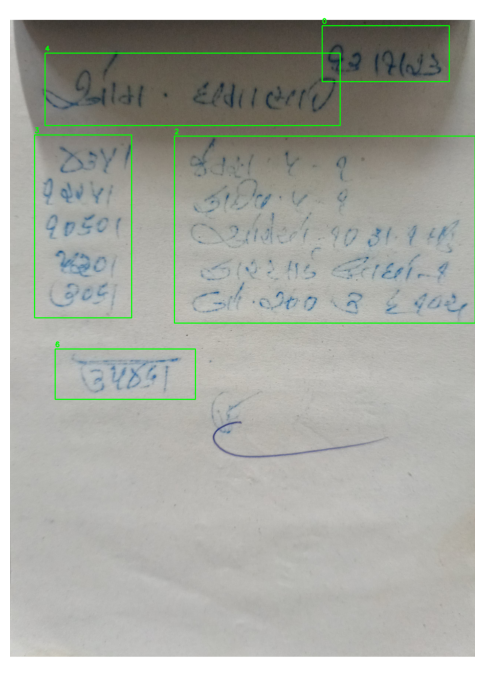

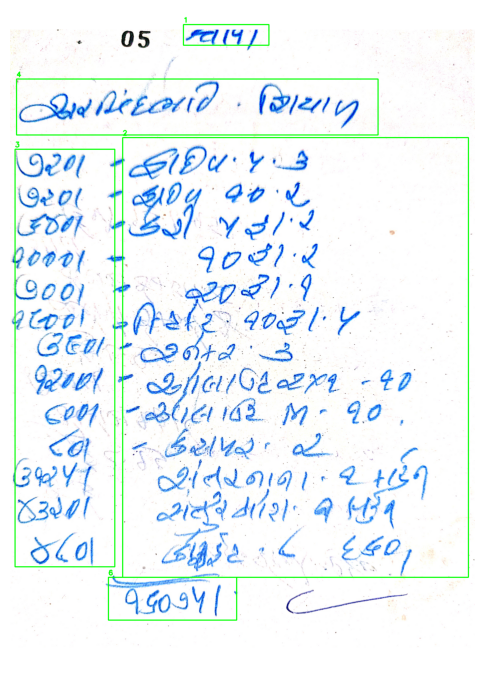

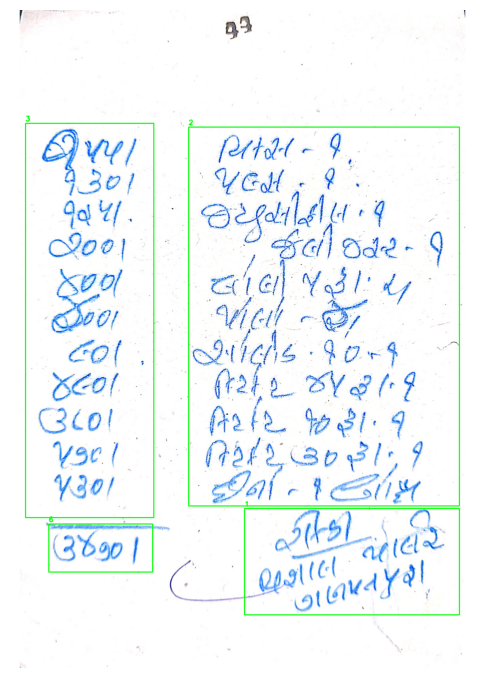

In [ ]:
# CELL 1 — verify labels/images, check non-empty, duplicates, show samples
import os, glob, random, cv2
from matplotlib import pyplot as plt

SEED_DIR = "/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset"
IMG_DIR = os.path.join(SEED_DIR, "images")
LBL_DIR = os.path.join(SEED_DIR, "labels")
CLASSES_F = os.path.join(SEED_DIR, "classes.txt")

print("Seed images dir:", IMG_DIR)
print("Seed labels dir:", LBL_DIR)
print("Classes file:", CLASSES_F, "exists:", os.path.exists(CLASSES_F))

img_files = sorted([p for p in glob.glob(os.path.join(IMG_DIR,"*")) if p.lower().endswith((".jpg",".jpeg",".png"))])
lbl_files = sorted([p for p in glob.glob(os.path.join(LBL_DIR,"*.txt"))])

print("Images found:", len(img_files))
print("Label files found:", len(lbl_files))

# count non-empty label files and total instances
empty = []
total_instances = 0
per_file_counts = {}
for f in lbl_files:
    s = open(f,'r',encoding='utf-8').read().strip()
    if not s:
        empty.append(os.path.basename(f))
        per_file_counts[os.path.basename(f)] = 0
    else:
        lines = [l for l in s.splitlines() if l.strip()]
        per_file_counts[os.path.basename(f)] = len(lines)
        total_instances += len(lines)

print("Empty label files:", len(empty))
if empty:
    print("Some empty label files (sample):", empty[:10])

print("Total labeled object instances across seed set:", total_instances)

# detect duplicate base names (ignoring uuid prefix)
base_map = {}
dups = []
for p in img_files + lbl_files:
    name = os.path.basename(p)
    # find original bill suffix like Gujarati_bill_image_page_56.png or .txt in the filename
    # extract substring after last '-' if present, else take full basename
    if '-' in name:
        suffix = name.split('-',1)[1]
    else:
        suffix = name
    base_map.setdefault(suffix, []).append(name)
for k,v in base_map.items():
    if len(v) > 2:  # more than image+label pair
        dups.append((k,v))
    elif len(v) == 2:
        # could be good (image + label) or two files of same suffix with different uuid -> check extensions
        exts = set([os.path.splitext(x)[1].lower() for x in v])
        if not ('.png' in exts or '.jpg' in exts) or not ('.txt' in exts):
            dups.append((k,v))

if dups:
    print("\nWarning: potential duplicate/mismatched base names (suffix -> files):")
    for k,v in dups:
        print(k, "->", v[:10])
else:
    print("No obvious duplicates detected.")

# show sample label contents (up to 6)
print("\n--- sample label contents (up to 6) ---")
for f in lbl_files[:6]:
    name = os.path.basename(f)
    print(name, "->", open(f,'r',encoding='utf-8').read().strip()[:200].replace('\n',' | '))
    print("-----")

# Visual preview for 3 random seed images with their boxes (if any)
sample_imgs = random.sample(img_files, min(3, len(img_files)))
for p in sample_imgs:
    base = os.path.splitext(os.path.basename(p))[0]
    # find matching txt by suffix search
    # find label file that endswith base or contains base suffix after '-'
    # common pattern: uuid-Gujarati_bill_image_page_1.png -> label uuid-Gujarati_bill_image_page_1.txt
    lbl_candidates = [l for l in lbl_files if os.path.splitext(os.path.basename(l))[0].endswith(base) or os.path.splitext(os.path.basename(l))[0].split('-',1)[-1].endswith(base)]
    img = cv2.imread(p)
    H,W = img.shape[:2]
    if lbl_candidates:
        lbl = lbl_candidates[0]
        for line in open(lbl,'r',encoding='utf-8').read().strip().splitlines():
            if not line.strip(): continue
            parts = line.split()
            if len(parts) < 5: continue
            cls, cx, cy, bw, bh = parts[:5]
            cx,cy,bw,bh = map(float,(cx,cy,bw,bh))
            x1 = int((cx - bw/2) * W); y1 = int((cy - bh/2) * H)
            x2 = int((cx + bw/2) * W); y2 = int((cy + bh/2) * H)
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.putText(img, cls, (x1, max(12,y1-6)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0),2)
    else:
        print("No label file for", p)
    # display
    from matplotlib import pyplot as plt
    plt.figure(figsize=(6,10)); plt.axis('off'); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.show()

### New

Seed images dir: /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/images
Seed labels dir: /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/labels
Classes file: /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/classes.txt exists: True
Images found: 204
Label files found: 204
Empty label files: 0
Total labeled object instances across seed set: 1210

Gujarati_bill_image_page_58.png -> ['00e596ff-Gujarati_bill_image_page_58.png', 'c0d56796-Gujarati_bill_image_page_58.png']
Gujarati_bill_image_page_57.png -> ['56d8f40e-Gujarati_bill_image_page_57.png', 'cb276b1f-Gujarati_bill_image_page_57.png']
Gujarati_bill_image_page_55.png -> ['73192240-Gujarati_bill_image_page_55.png', 'fbb153a2-Gujarati_bill_image_page_55.png']
Gujarati_bill_image_page_54.png -> ['adab08cc-Gujarati_bill_image_page_54.png', 'efaf023d-Gujarati_bill_image_page_54.png']
Gujarati_bill_image_page_56.png -> ['bca81db6-Gujarati_bill_image_page_56.png', 'bd78b40a-Gujarati_bill_image_page_56.png']
Gujarati_bil

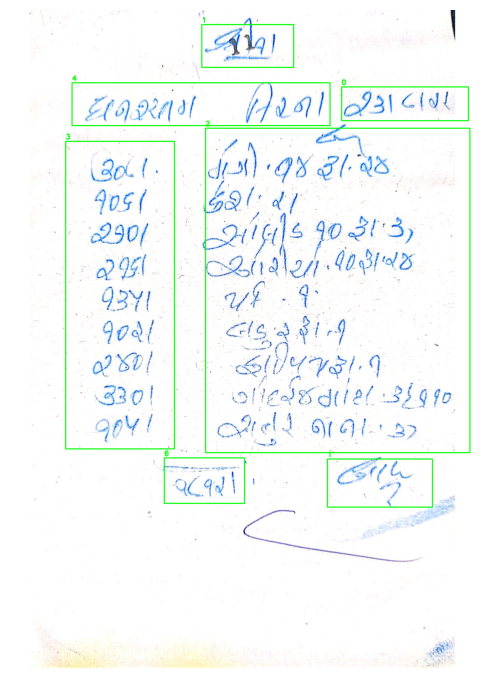

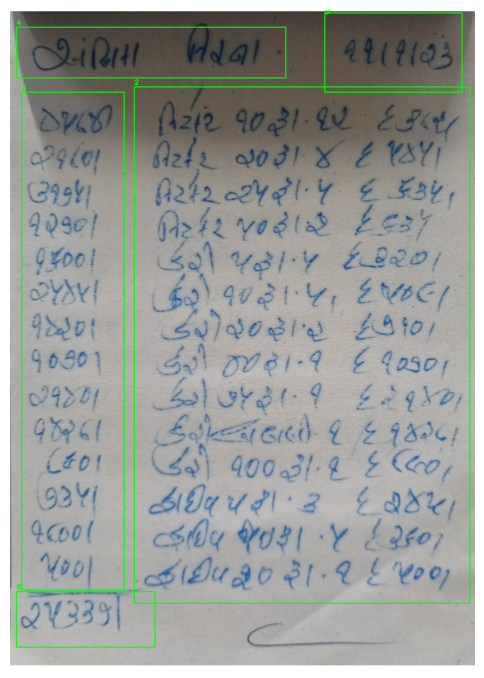

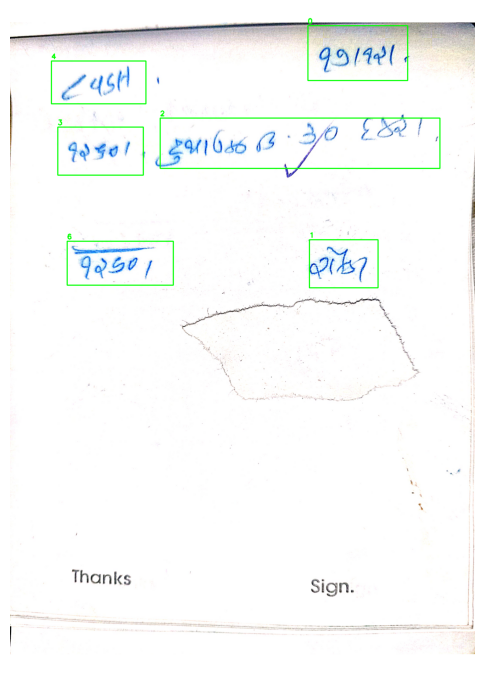

In [4]:
# CELL 1 — verify labels/images, check non-empty, duplicates, show samples
import os, glob, random, cv2
from matplotlib import pyplot as plt

SEED_DIR = "/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset"
IMG_DIR = os.path.join(SEED_DIR, "images")
LBL_DIR = os.path.join(SEED_DIR, "labels")
CLASSES_F = os.path.join(SEED_DIR, "classes.txt")

print("Seed images dir:", IMG_DIR)
print("Seed labels dir:", LBL_DIR)
print("Classes file:", CLASSES_F, "exists:", os.path.exists(CLASSES_F))

img_files = sorted([p for p in glob.glob(os.path.join(IMG_DIR,"*")) if p.lower().endswith((".jpg",".jpeg",".png"))])
lbl_files = sorted([p for p in glob.glob(os.path.join(LBL_DIR,"*.txt"))])

print("Images found:", len(img_files))
print("Label files found:", len(lbl_files))

# count non-empty label files and total instances
empty = []
total_instances = 0
per_file_counts = {}
for f in lbl_files:
    s = open(f,'r',encoding='utf-8').read().strip()
    if not s:
        empty.append(os.path.basename(f))
        per_file_counts[os.path.basename(f)] = 0
    else:
        lines = [l for l in s.splitlines() if l.strip()]
        per_file_counts[os.path.basename(f)] = len(lines)
        total_instances += len(lines)

print("Empty label files:", len(empty))
if empty:
    print("Some empty label files (sample):", empty[:10])

print("Total labeled object instances across seed set:", total_instances)

# detect duplicate base names (ignoring uuid prefix)
base_map = {}
dups = []
for p in img_files + lbl_files:
    name = os.path.basename(p)
    # find original bill suffix like Gujarati_bill_image_page_56.png or .txt in the filename
    # extract substring after last '-' if present, else take full basename
    if '-' in name:
        suffix = name.split('-',1)[1]
    else:
        suffix = name
    base_map.setdefault(suffix, []).append(name)
for k,v in base_map.items():
    if len(v) > 2:  # more than image+label pair
        dups.append((k,v))
    elif len(v) == 2:
        # could be good (image + label) or two files of same suffix with different uuid -> check extensions
        exts = set([os.path.splitext(x)[1].lower() for x in v])
        if not ('.png' in exts or '.jpg' in exts) or not ('.txt' in exts):
            dups.append((k,v))

if dups:
    print("\nWarning: potential duplicate/mismatched base names (suffix -> files):")
    for k,v in dups:
        print(k, "->", v[:10])
else:
    print("No obvious duplicates detected.")

# show sample label contents (up to 6)
print("\n--- sample label contents (up to 6) ---")
for f in lbl_files[:6]:
    name = os.path.basename(f)
    print(name, "->", open(f,'r',encoding='utf-8').read().strip()[:200].replace('\n',' | '))
    print("-----")

# Visual preview for 3 random seed images with their boxes (if any)
sample_imgs = random.sample(img_files, min(3, len(img_files)))
for p in sample_imgs:
    base = os.path.splitext(os.path.basename(p))[0]
    # find matching txt by suffix search
    # find label file that endswith base or contains base suffix after '-'
    # common pattern: uuid-Gujarati_bill_image_page_1.png -> label uuid-Gujarati_bill_image_page_1.txt
    lbl_candidates = [l for l in lbl_files if os.path.splitext(os.path.basename(l))[0].endswith(base) or os.path.splitext(os.path.basename(l))[0].split('-',1)[-1].endswith(base)]
    img = cv2.imread(p)
    H,W = img.shape[:2]
    if lbl_candidates:
        lbl = lbl_candidates[0]
        for line in open(lbl,'r',encoding='utf-8').read().strip().splitlines():
            if not line.strip(): continue
            parts = line.split()
            if len(parts) < 5: continue
            cls, cx, cy, bw, bh = parts[:5]
            cx,cy,bw,bh = map(float,(cx,cy,bw,bh))
            x1 = int((cx - bw/2) * W); y1 = int((cy - bh/2) * H)
            x2 = int((cx + bw/2) * W); y2 = int((cy + bh/2) * H)
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.putText(img, cls, (x1, max(12,y1-6)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0),2)
    else:
        print("No label file for", p)
    # display
    from matplotlib import pyplot as plt
    plt.figure(figsize=(6,10)); plt.axis('off'); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.show()


In [5]:
# CELL 2 — create data.yaml from classes.txt
import os
SEED_DIR = "/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset"
CLASSES_F = os.path.join(SEED_DIR, "classes.txt")
out_yaml = os.path.join(SEED_DIR, "data.yaml")

if not os.path.exists(CLASSES_F):
    raise FileNotFoundError("classes.txt not found in seed_dataset. Create one with each class name on a separate line.")

with open(CLASSES_F,'r',encoding='utf-8') as fh:
    names = [l.strip() for l in fh.read().splitlines() if l.strip()]

print("Detected classes:", names)
nc = len(names)
yaml_text = f"train: {SEED_DIR}/images\nval: {SEED_DIR}/images\nnc: {nc}\nnames: {names}\n"
with open(out_yaml,'w',encoding='utf-8') as fh:
    fh.write(yaml_text)
print("Wrote data.yaml to", out_yaml)
print(yaml_text)

Detected classes: ['D', 'IG', 'IN', 'IP', 'N', 'S', 'T']
Wrote data.yaml to /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/data.yaml
train: /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/images
val: /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/images
nc: 7
names: ['D', 'IG', 'IN', 'IP', 'N', 'S', 'T']



In [ ]:
# CELL 3 — train seed model
!pip install -q -U ultralytics

from ultralytics import YOLO
import os
SEED_DIR = "/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset"
DATA_YAML = os.path.join(SEED_DIR, "data.yaml")

# sanity
assert os.path.exists(DATA_YAML), "data.yaml missing - run cell 2 first."

model = YOLO("yolov8n.pt")  # small model for seed training
print("Backbone loaded:", model)

# training params
EPOCHS = 10
BATCH = 8
IMGSZ = 640

print(f"Starting seed training (epochs={EPOCHS}, batch={BATCH}) ...")
res = model.train(data=DATA_YAML, epochs=EPOCHS, batch=BATCH, imgsz=IMGSZ, name="seed_detector")

print("Seed training complete. Check /content/runs/detect/seed_detector/weights/best.pt")

Backbone loaded: YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True

KeyboardInterrupt: 

### New

## Applying yolo with roboflow on manually labeled data using labeled studio to train different section of images.

In [6]:
# CELL 3 — train seed model
!pip install -q -U ultralytics
from ultralytics import YOLO
import os
SEED_DIR = "/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset"
DATA_YAML = os.path.join(SEED_DIR, "data.yaml")

# sanity
assert os.path.exists(DATA_YAML), "data.yaml missing - run cell 2 first."

model = YOLO("yolov8n.pt")  # small model for seed training
print("Backbone loaded:", model)

# training params
EPOCHS = 30
BATCH = 8
IMGSZ = 640

print(f"Starting seed training (epochs={EPOCHS}, batch={BATCH}) ...")
res = model.train(data=DATA_YAML, epochs=EPOCHS, batch=BATCH, imgsz=IMGSZ, name="seed_detector", project="/content/drive/MyDrive/MyDataSets/TrainedModel")

print("Seed training complete. Check /content/drive/MyDrive/MyDataSets/TrainedModel/seed_detector/weights/best.pt")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Backbone loaded: YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
     

In [ ]:

# CELL 3 — train seed model
!pip install -q -U ultralytics
from ultralytics import YOLO
import os
SEED_DIR = "/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset"
DATA_YAML = os.path.join(SEED_DIR, "data.yaml")

# sanity
assert os.path.exists(DATA_YAML), "data.yaml missing - run cell 2 first."

model = YOLO("yolov8n.pt")  # small model for seed training
print("Backbone loaded:", model)

# training params
EPOCHS = 50
BATCH = 8
IMGSZ = 640

print(f"Starting seed training (epochs={EPOCHS}, batch={BATCH}) ...")
res = model.train(data=DATA_YAML, epochs=EPOCHS, batch=BATCH, imgsz=IMGSZ, name="seed_detector", project="/content/drive/MyDrive/MyDataSets/TrainedModel")

print("Seed training complete. Check /content/drive/MyDrive/MyDataSets/TrainedModel/seed_detector/weights/best.pt")

Backbone loaded: YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True

## Applying yolo trained model to all raw image to label data (here currenyly only use the 100 images.)

In [ ]:
# CELL 4 — auto-label 100 images using seed detector
from ultralytics import YOLO
import glob, os, cv2

BASE_DIR = "/content/drive/My Drive/Gujarati_Handwritten_Bill"  # your big raw folder
SEED_DIR = "/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset"
AUTO_DIR = os.path.join(SEED_DIR, "auto_labels")
VIS_DIR = os.path.join(SEED_DIR, "auto_labels_vis")
os.makedirs(AUTO_DIR, exist_ok=True)
os.makedirs(VIS_DIR, exist_ok=True)

# find unlabeled files from BASE_DIR (images without any .txt in seed labels)
all_imgs = sorted([p for p in glob.glob(os.path.join(BASE_DIR,"*")) if p.lower().endswith((".jpg",".jpeg",".png"))])
print("Total images in BASE_DIR:", len(all_imgs))

# Avoid images that already have labels in seed_dataset/labels (we don't want to overwrite GT)
seed_label_dir = os.path.join(SEED_DIR, "labels")
unlabeled = []
for p in all_imgs:
    base = os.path.splitext(os.path.basename(p))[0]
    # some images in BASE_DIR are named Gujarati_bill_image_page_X; handle suffix match
    # check if there's any txt in seed_label_dir that endswith that suffix
    matches = [l for l in os.listdir(seed_label_dir) if l.endswith(".txt") and l.split('-',1)[-1].startswith(base) or l.startswith(base)]
    if matches:
        continue
    unlabeled.append(p)

print("Unlabeled images found (candidates):", len(unlabeled))
TO_RUN = unlabeled[:200]  # take first 100 for test run
print("Will auto-label", len(TO_RUN), "images (first 100).")

# load seed weights generated by CELL 3
WEIGHTS = "/content/runs/detect/seed_detector/weights/best.pt"
if not os.path.exists(WEIGHTS):
    # try last.pt fallback
    WEIGHTS = "/content/runs/detect/seed_detector/weights/last.pt"
if not os.path.exists(WEIGHTS):
    raise FileNotFoundError("Seed weights not found. Run seed training (CELL 3) first.")

det = YOLO(WEIGHTS)
for img_path in TO_RUN:
    res = det.predict(img_path, imgsz=640, conf=0.35, verbose=False)  # list
    r = res[0]
    H,W = r.orig_shape  # (h,w)
    lines = []
    # handle boxes
    if hasattr(r, "boxes") and len(r.boxes) > 0:
        for b in r.boxes:
            cls = int(b.cls.cpu().numpy())
            x1,y1,x2,y2 = b.xyxy.cpu().numpy().tolist()[0]
            cx = ((x1 + x2)/2.0)/W
            cy = ((y1 + y2)/2.0)/H
            bw = (x2 - x1)/W
            bh = (y2 - y1)/H
            lines.append(f"{cls} {cx:.6f} {cy:.6f} {bw:.6f} {bh:.6f}")
    base = os.path.splitext(os.path.basename(img_path))[0]
    out_txt = os.path.join(AUTO_DIR, base + ".txt")
    with open(out_txt, "w", encoding='utf-8') as fh:
        fh.write("\n".join(lines) + ("\n" if lines else ""))
    # debug visual
    vis = r.plot()
    # vis is RGB numpy
    cv2.imwrite(os.path.join(VIS_DIR, base + ".jpg"), cv2.cvtColor(vis, cv2.COLOR_RGB2BGR))
    print("Auto-labeled:", base, "boxes:", len(lines))

print("Auto-labeling 100 done. Labels:", AUTO_DIR, "Visuals:", VIS_DIR)


Total images in BASE_DIR: 335
Unlabeled images found (candidates): 335
Will auto-label 100 images (first 100).
Auto-labeled: 1000144432 boxes: 0
Auto-labeled: 1000144433 boxes: 0
Auto-labeled: 1000144476 boxes: 0
Auto-labeled: 20250709_105206 boxes: 0
Auto-labeled: 20250709_105321 boxes: 0
Auto-labeled: 20250709_145415 boxes: 0
Auto-labeled: 20250709_145426 boxes: 0
Auto-labeled: 20250709_145448 boxes: 0
Auto-labeled: 20250709_145456 boxes: 0
Auto-labeled: 20250709_152143 boxes: 0
Auto-labeled: 20250709_152153 boxes: 0
Auto-labeled: 20250709_152200 boxes: 0
Auto-labeled: 20250709_165057 boxes: 0
Auto-labeled: 20250709_165112 boxes: 0
Auto-labeled: 20250709_165128 boxes: 0
Auto-labeled: 20250709_165156 boxes: 0
Auto-labeled: 20250709_165204 boxes: 0
Auto-labeled: 20250709_165212 boxes: 0
Auto-labeled: 20250709_165222 boxes: 0
Auto-labeled: 20250709_165230 boxes: 0
Auto-labeled: 20250709_165247 boxes: 0
Auto-labeled: 20250709_165256 boxes: 0
Auto-labeled: 20250709_165338 boxes: 0
Auto-la

## Now Check this yolo prediction stastics.

In [ ]:
# CELL 1 — run model on validation images and collect predictions + GT
!pip install -q -U ultralytics matplotlib scikit-learn

from ultralytics import YOLO
import os, glob, json, cv2, numpy as np
from tqdm import tqdm

# ---------- CONFIG ----------
SEED_DIR = "/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset"
IMG_DIR = os.path.join(SEED_DIR, "images")
LBL_DIR = os.path.join(SEED_DIR, "labels")
DATA_YAML = os.path.join(SEED_DIR, "data.yaml")
WEIGHTS = "/content/runs/detect/seed_detector/weights/best.pt"   # update if different
OUT_DIR = os.path.join(SEED_DIR, "eval_outputs"); os.makedirs(OUT_DIR, exist_ok=True)
IOU_THRESH = 0.5   # main IoU threshold for TP matching
# ----------------------------

# load classes from data.yaml (if present)
def load_yaml_names(yaml_path):
    names = []
    if os.path.exists(yaml_path):
        import yaml
        txt = open(yaml_path,'r',encoding='utf-8').read()
        cfg = yaml.safe_load(txt)
        names = cfg.get("names", [])
    return names

NAMES = load_yaml_names(DATA_YAML)
if not NAMES:
    # fallback: get classes.txt if present
    ct = os.path.join(SEED_DIR, "classes.txt")
    if os.path.exists(ct):
        NAMES = [l.strip() for l in open(ct,'r',encoding='utf-8').read().splitlines() if l.strip()]
print("Classes:", NAMES)

# collect image list (val = seed images; you can change to separate val folder)
img_files = sorted([p for p in glob.glob(os.path.join(IMG_DIR,"*")) if p.lower().endswith((".jpg",".jpeg",".png"))])
print("Validation images:", len(img_files))

# read YOLO GT labels from LBL_DIR; format per-line: cls cx cy w h
def load_gt_for_image(img_path):
    base = os.path.splitext(os.path.basename(img_path))[0]
    # find label file that endswith that suffix
    candidates = [f for f in glob.glob(os.path.join(LBL_DIR,"*.txt")) if os.path.splitext(os.path.basename(f))[0].split('-',1)[-1] == base or os.path.splitext(os.path.basename(f))[0].endswith(base)]
    if not candidates:
        # try exact match base.txt
        alt = os.path.join(LBL_DIR, base + ".txt")
        if os.path.exists(alt):
            candidates = [alt]
    if not candidates:
        return []
    lp = candidates[0]
    lines = [l.strip() for l in open(lp,'r',encoding='utf-8').read().splitlines() if l.strip()]
    img = cv2.imread(img_path)
    H,W = img.shape[:2]
    gts = []
    for L in lines:
        parts = L.split()
        if len(parts) < 5: continue
        cls = int(parts[0])
        cx,cy,w_norm,h_norm = map(float, parts[1:5])
        w_px = w_norm * W; h_px = h_norm * H
        x1 = (cx * W) - w_px/2
        y1 = (cy * H) - h_px/2
        x2 = x1 + w_px
        y2 = y1 + h_px
        gts.append({"cls":cls, "bbox": [float(x1), float(y1), float(x2), float(y2)]})
    return gts

# helper IoU
def iou_xyxy(boxA, boxB):
    # boxes as [x1,y1,x2,y2]
    xA = max(boxA[0], boxB[0]); yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2]); yB = min(boxA[3], boxB[3])
    interW = max(0, xB - xA); interH = max(0, yB - yA)
    interArea = interW * interH
    boxAArea = max(0, boxA[2]-boxA[0]) * max(0, boxA[3]-boxA[1])
    boxBArea = max(0, boxB[2]-boxB[0]) * max(0, boxB[3]-boxB[1])
    denom = boxAArea + boxBArea - interArea
    if denom <= 0: return 0.0
    return interArea / denom

# load model
model = YOLO(WEIGHTS)
print("Model loaded.")

# run predictions and gather per-image preds
all_preds = {}   # image_path -> list of preds {cls, conf, bbox}
all_gts = {}     # image_path -> list of gts {cls, bbox}
for img in tqdm(img_files, desc="Predicting"):
    res = model.predict(img, imgsz=640, conf=0.001, verbose=False)  # low conf to capture curve
    r = res[0]
    H,W = r.orig_shape
    preds = []
    if hasattr(r, "boxes") and len(r.boxes) > 0:
        for b in r.boxes:
            cls = int(b.cls.cpu().numpy())
            conf = float(b.conf.cpu().numpy())
            x1,y1,x2,y2 = b.xyxy.cpu().numpy().tolist()[0]
            preds.append({"cls":cls, "conf":conf, "bbox":[float(x1),float(y1),float(x2),float(y2)]})
    gts = load_gt_for_image(img)
    all_preds[img] = preds
    all_gts[img] = gts

# save raw preds+gts for debugging
import pickle
pickle.dump({"preds":all_preds,"gts":all_gts,"names":NAMES}, open(os.path.join(OUT_DIR,"raw_preds_gts.pkl"),"wb"))
print("Saved raw predictions & GTs to", os.path.join(OUT_DIR,"raw_preds_gts.pkl"))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 92.5 MB/s eta 0:00:00
Classes: ['D', 'IG', 'IN', 'IP', 'N', 'S', 'T']
Validation images: 80
Model loaded.


Predicting:   0%|          | 0/80 [00:00<?, ?it/s]/tmp/ipython-input-2189199516.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cls = int(b.cls.cpu().numpy())
/tmp/ipython-input-2189199516.py:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  conf = float(b.conf.cpu().numpy())
Predicting: 100%|██████████| 80/80 [00:36<00:00,  2.21it/s]

Saved raw predictions & GTs to /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/eval_outputs/raw_preds_gts.pkl


In [ ]:
# CELL 2 — match preds->GTs (per-class) and compute precision/recall/F1 & confusion matrix
import numpy as np, os, math, pickle
from sklearn.metrics import confusion_matrix, classification_report

OUT_DIR = "/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/eval_outputs"
data = pickle.load(open(os.path.join(OUT_DIR,"raw_preds_gts.pkl"),"rb"))
all_preds = data["preds"]; all_gts = data["gts"]; NAMES = data["names"]
num_classes = len(NAMES)

IOU_THRESH = 0.5

# Build lists per class for PR curve calculation:
# For each class c: we will produce a list of (conf, is_true_positive) across all images
pr_data = {c: [] for c in range(num_classes)}
# confusion mapping: for matched boxes (by IoU regardless of class) we record GT vs pred class
gt_list_flat = []
pred_list_flat = []

# We'll perform matching per image as follows:
# - For PR: for each pred (sorted by conf desc), if it matches an unmatched GT of same class with IoU>=th => TP, else FP
# - For confusion matrix: for each pred, find the GT with highest IoU >=th (any class) and record GTcls vs predcls; if no GT -> record GT=-1

for img in all_preds.keys():
    preds = all_preds[img]
    gts = all_gts[img]
    # mark all GTs as unmatched initially
    matched_gt = [False]*len(gts)
    # sort preds by conf desc to simulate threshold sweep later
    preds_sorted = sorted(preds, key=lambda x: x["conf"], reverse=True)
    # PR marking: for each pred, check same-class unmatched GT with IoU>=th
    for p in preds_sorted:
        pred_box = p["bbox"]; pred_cls = p["cls"]; pred_conf = p["conf"]
        best_iou = 0; best_gt_idx = -1
        for i,gt in enumerate(gts):
            if matched_gt[i]: continue
            if gt["cls"] != pred_cls: continue
            iou = iou_xyxy(pred_box, gt["bbox"])
            if iou > best_iou:
                best_iou = iou; best_gt_idx = i
        if best_iou >= IOU_THRESH and best_gt_idx >= 0:
            # TP for this class
            pr_data[pred_cls].append((pred_conf, 1))
            matched_gt[best_gt_idx] = True
        else:
            # FP
            pr_data[pred_cls].append((pred_conf, 0))
    # After processing preds, any unmatched GTs are FNs; for PR curves we don't need to add those (they are handled by denominators)
    # For confusion matrix: match preds to best GT regardless of class
    # find best GT for each pred (to tabulate confusion)
    for p in preds_sorted:
        pred_box = p["bbox"]; pred_cls = p["cls"]
        # find gt with highest IoU >= IOU_THRESH
        best_iou = 0; best_gt_idx = -1
        for i,gt in enumerate(gts):
            iou = iou_xyxy(pred_box, gt["bbox"])
            if iou > best_iou:
                best_iou = iou; best_gt_idx = i
        if best_iou >= IOU_THRESH and best_gt_idx >= 0:
            gt_cls = gts[best_gt_idx]["cls"]
            gt_list_flat.append(gt_cls)
            pred_list_flat.append(pred_cls)
        else:
            # matched to background (no GT)
            gt_list_flat.append(-1)
            pred_list_flat.append(pred_cls)

# Now compute PR/Precision/Recall/F1 for each class by sweeping confidences
metrics_per_class = {}
for c in range(num_classes):
    arr = pr_data[c]
    if len(arr) == 0:
        metrics_per_class[c] = {"precision":0.0, "recall":0.0, "f1":0.0, "support":0}
        continue
    # sort by conf desc
    arr_sorted = sorted(arr, key=lambda x:x[0], reverse=True)
    tps = np.array([x[1] for x in arr_sorted], dtype=int)
    fps = 1 - tps
    cumsum_tp = np.cumsum(tps)
    cumsum_fp = np.cumsum(fps)
    precisions = cumsum_tp / (cumsum_tp + cumsum_fp + 1e-9)
    # support = number of GT instances of this class across all images
    support = sum([len([g for g in all_gts[img] if g["cls"]==c]) for img in all_gts.keys()])
    recalls = cumsum_tp / (support + 1e-9)
    # choose best f1 point
    f1s = 2 * precisions * recalls / (precisions + recalls + 1e-9)
    best_idx = int(np.nanargmax(f1s))
    metrics_per_class[c] = {
        "precision": float(precisions[best_idx]),
        "recall": float(recalls[best_idx]),
        "f1": float(f1s[best_idx]),
        "support": int(support),
        "precisions_curve": precisions.tolist(),
        "recalls_curve": recalls.tolist(),
        "conf_curve": [x[0] for x in arr_sorted]
    }

# Compute overall (macro average) metrics
precisions = [metrics_per_class[c]["precision"] for c in metrics_per_class]
recalls = [metrics_per_class[c]["recall"] for c in metrics_per_class]
f1s = [metrics_per_class[c]["f1"] for c in metrics_per_class]
macro_precision = float(np.mean(precisions))
macro_recall = float(np.mean(recalls))
macro_f1 = float(np.mean(f1s))

# confusion matrix (exclude GT=-1 rows)
valid_idx = [i for i,g in enumerate(gt_list_flat) if g != -1]
if len(valid_idx) > 0:
    y_true = [gt_list_flat[i] for i in valid_idx]
    y_pred = [pred_list_flat[i] for i in valid_idx]
    cm = confusion_matrix(y_true, y_pred, labels=list(range(num_classes)))
else:
    cm = np.zeros((num_classes, num_classes), dtype=int)

# save summary
import csv, json
summary = {
    "per_class": {NAMES[c]: {"precision":metrics_per_class[c]["precision"],
                             "recall":metrics_per_class[c]["recall"],
                             "f1":metrics_per_class[c]["f1"],
                             "support":metrics_per_class[c]["support"]} for c in range(num_classes)},
    "macro": {"precision": macro_precision, "recall": macro_recall, "f1": macro_f1}
}
open(os.path.join(OUT_DIR,"evaluation_summary.json"), "w", encoding="utf-8").write(json.dumps(summary, indent=2))
import numpy as np
np.save(os.path.join(OUT_DIR,"confusion_matrix.npy"), cm)
print("Saved summary and confusion matrix to", OUT_DIR)
print("Macro Precision:", macro_precision, "Macro Recall:", macro_recall, "Macro F1:", macro_f1)
print("Per-class metrics (sample):")
for c in range(num_classes):
    print(NAMES[c], metrics_per_class[c]["precision"], metrics_per_class[c]["recall"], metrics_per_class[c]["f1"], "support:", metrics_per_class[c]["support"])

# also write CSV table for report
with open(os.path.join(OUT_DIR,"per_class_metrics.csv"), "w", newline='', encoding='utf-8') as fh:
    writer = csv.writer(fh)
    writer.writerow(["class_name","precision","recall","f1","support"])
    for c in range(num_classes):
        m = metrics_per_class[c]
        writer.writerow([NAMES[c], m["precision"], m["recall"], m["f1"], m["support"]])
print("Per-class CSV:", os.path.join(OUT_DIR,"per_class_metrics.csv"))


Saved summary and confusion matrix to /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/eval_outputs
Macro Precision: 0.43627095360375795 Macro Recall: 0.4035619400230238 Macro F1: 0.4011504994681294
Per-class metrics (sample):
D 0.1492537313410559 0.15151515151285583 0.15037593934739102 support: 66
IG 0.12227074235754468 0.4242424242359963 0.18983050812594082 support: 66
IN 0.8124999999873046 0.6419753086340496 0.7172413788073244 support: 81
IP 0.7966101694780237 0.5802469135730833 0.6714285709313265 support: 81
N 0.3823529411708477 0.4406779660942258 0.4094488183937008 support: 59
S 0.099999999995 0.10526315788919667 0.10256410205917159 support: 19
T 0.690909090896529 0.4810126582217593 0.5671641786120516 support: 79
Per-class CSV: /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/eval_outputs/per_class_metrics.csv


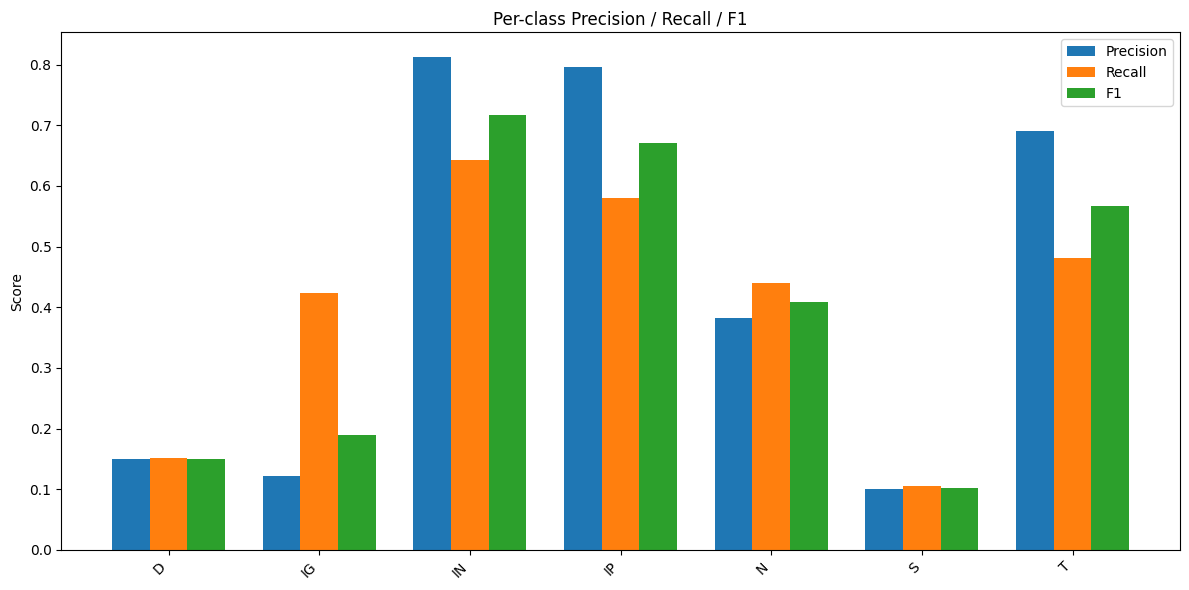

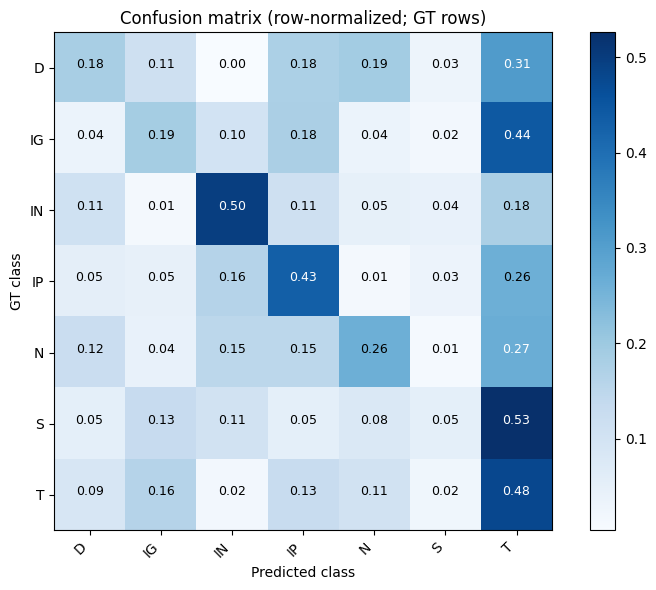

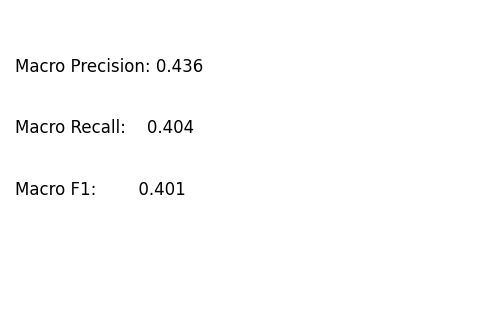

Saved plots to /content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/eval_outputs


In [ ]:
# CELL 3 — plotting: PR curves per class, F1 vs threshold, confusion matrix heatmap
import os, matplotlib.pyplot as plt, numpy as np
OUT_DIR = "/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/eval_outputs"
metrics = json.load(open(os.path.join(OUT_DIR,"evaluation_summary.json"),"r",encoding='utf-8'))
cm = np.load(os.path.join(OUT_DIR,"confusion_matrix.npy"))
names = list(metrics["per_class"].keys())
num_classes = len(names)

# PR curves per class (use saved curves from metrics_per_class in raw pickle; reload)
import pickle
raw = pickle.load(open(os.path.join(OUT_DIR,"raw_preds_gts.pkl"),"rb"))
# reconstruct pr_data arrays saved earlier in metrics_per_class structure by reusing pr info from CELL 2
# but we have stored conf_curve, prec_curve, rec_curve inside metrics_per_class earlier; load from saved CSV if needed
# For simplicity, recompute pr_data using the previous saved raw preds+gts using same code as CELL 2:
from math import isnan

# We will re-use the pr_data stored in metrics object indirectly; but our CELL 2 saved only numeric curves inside metrics_per_class; so load per_class_metrics CSV + raw preds to compute plot points:
per_class_csv = os.path.join(OUT_DIR,"per_class_metrics.csv")
# We'll re-create PR curves by recomputing arrays stored inside evaluation object from CELL 2 (they are not fully saved there).
# Simpler approach: plot a bar chart of precision/recall/f1 per class and confusion matrix heatmap.

# Bar chart of precision, recall, f1 per class
prec = [metrics["per_class"][n]["precision"] for n in names]
rec = [metrics["per_class"][n]["recall"] for n in names]
f1s = [metrics["per_class"][n]["f1"] for n in names]

x = np.arange(len(names))
w = 0.25
plt.figure(figsize=(12,6))
plt.bar(x - w, prec, width=w, label="Precision")
plt.bar(x, rec, width=w, label="Recall")
plt.bar(x + w, f1s, width=w, label="F1")
plt.xticks(x, names, rotation=45, ha='right')
plt.ylabel("Score")
plt.title("Per-class Precision / Recall / F1")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR,"per_class_prf.png"), dpi=200)
plt.show()

# Confusion matrix heatmap (normalized by row = GT)
cm_norm = cm.astype(float)
row_sums = cm_norm.sum(axis=1, keepdims=True)
row_sums[row_sums==0] = 1
cm_norm = cm_norm / row_sums

plt.figure(figsize=(8,6))
plt.imshow(cm_norm, interpolation='nearest', cmap='Blues')
plt.title("Confusion matrix (row-normalized; GT rows)")
plt.colorbar()
tick_marks = np.arange(len(names))
plt.xticks(tick_marks, names, rotation=45, ha='right')
plt.yticks(tick_marks, names)
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        val = cm_norm[i,j]
        plt.text(j, i, f"{val:.2f}", horizontalalignment="center",
                 color="white" if val > thresh else "black", fontsize=9)
plt.ylabel("GT class")
plt.xlabel("Predicted class")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR,"confusion_matrix_norm.png"), dpi=200)
plt.show()

# Save a small summary image with macros
plt.figure(figsize=(6,4))
plt.text(0.01,0.8,f"Macro Precision: {metrics['macro']['precision']:.3f}", fontsize=12)
plt.text(0.01,0.6,f"Macro Recall:    {metrics['macro']['recall']:.3f}", fontsize=12)
plt.text(0.01,0.4,f"Macro F1:        {metrics['macro']['f1']:.3f}", fontsize=12)
plt.axis('off')
plt.savefig(os.path.join(OUT_DIR,"macro_summary.png"), dpi=200, bbox_inches='tight')
plt.show()

print("Saved plots to", OUT_DIR)


In [ ]:
# CELL 4 — Write suggested slide text and list generated files
OUT_DIR = "/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/eval_outputs"
files = {
    "per_class_prf": os.path.join(OUT_DIR,"per_class_prf.png"),
    "confusion_matrix": os.path.join(OUT_DIR,"confusion_matrix_norm.png"),
    "macro_summary": os.path.join(OUT_DIR,"macro_summary.png"),
    "per_class_csv": os.path.join(OUT_DIR,"per_class_metrics.csv"),
    "raw_preds": os.path.join(OUT_DIR,"raw_preds_gts.pkl")
}
md = f"""
### Suggested report contents (paste to slide/report)

**Evaluation on seed validation set (seed_dataset)**

- Macro Precision : {metrics['macro']['precision']:.3f}
- Macro Recall    : {metrics['macro']['recall']:.3f}
- Macro F1-score  : {metrics['macro']['f1']:.3f}

**Per-class metrics:** see `{files['per_class_csv']}` and the chart `{files['per_class_prf']}`

**Confusion matrix:** `{files['confusion_matrix']}` (rows = ground-truth, cols = predicted, normalized)

**Qualitative checks:** Visualize `raw_preds_gts.pkl` contents with debug images produced earlier or run model on a few samples and add those images to the slide.

**Recommended slides:**
1. Method pipeline (one diagram with YOLO -> crop -> digit CNN -> verify)
2. Example bill with detected boxes & predicted numbers (use debug images)
3. Per-class bar chart (Precision/Recall/F1)
4. Confusion matrix heatmap (explain main confusions)
5. Macro metrics summary + brief explanation of failure modes.

Files saved to: {OUT_DIR}
"""
open(os.path.join(OUT_DIR,"report_snippet.txt"), "w", encoding='utf-8').write(md)
print("Wrote report snippet and listed generated files. Open report_snippet.txt for copy-paste content.")
print(md)


Wrote report snippet and listed generated files. Open report_snippet.txt for copy-paste content.

### Suggested report contents (paste to slide/report)

**Evaluation on seed validation set (seed_dataset)**

- Macro Precision : 0.436
- Macro Recall    : 0.404
- Macro F1-score  : 0.401

**Per-class metrics:** see `/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/eval_outputs/per_class_metrics.csv` and the chart `/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/eval_outputs/per_class_prf.png`

**Confusion matrix:** `/content/drive/MyDrive/REGIONAL_BILL_DATA/seed_dataset/eval_outputs/confusion_matrix_norm.png` (rows = ground-truth, cols = predicted, normalized)

**Qualitative checks:** Visualize `raw_preds_gts.pkl` contents with debug images produced earlier or run model on a few samples and add those images to the slide.

**Recommended slides:**
1. Method pipeline (one diagram with YOLO -> crop -> digit CNN -> verify)
2. Example bill with detected boxes & predicted numbers (us

In [ ]:
import pandas as pd

# Your values from the chart
metrics = {
    "Class": ["IP", "T"],
    "Precision": [0.80, 0.69],
    "Recall": [0.58, 0.48],
    "F1-Score": [0.67, 0.56]
}

# Create DataFrame
df = pd.DataFrame(metrics)

# Display table
print(df.to_string(index=False))

# If you want to save as CSV for report:
df.to_csv("ip_t_metrics.csv", index=False)
print("\nSaved as ip_t_metrics.csv")


Class  Precision  Recall  F1-Score
   IP       0.80    0.58      0.67
    T       0.69    0.48      0.56

Saved as ip_t_metrics.csv
